## Part 2: Intro to Data Visualization

Great job getting all the data together!! It was quite some work. Now will come the fun part: diving into the data. This will be a great chance to understand the field of Computational Social Science in a data-driven way and to apply the methods we will talk about in class.

Before we start, we're going to talk about Data Visualization. It is something I deeply care about, because visualizing is important both to analyse data and to show our results to others. 

In the two videos below, I will: (i) introduce general concepts on Data Visualization and (ii) present a few tips and techniques to improve the visual quality of your plots in Python. 

**In the assignments, I expect your plots to be informative, well-designed and clear to intepret. These aspects will be part of the evaluation.**

> * _Video Lecture_: [Intro to Data Visualization](https://www.youtube.com/watch?v=oLSdlg3PUO0)

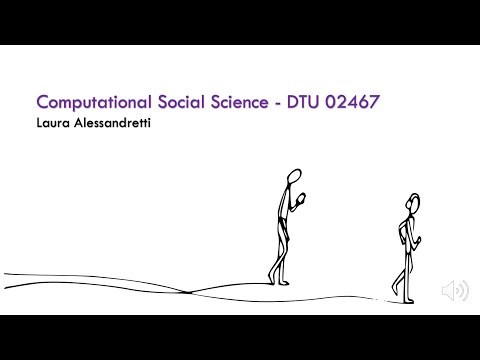

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("oLSdlg3PUO0",width=800, height=450)

Before even starting visualizing some cool data, I just want to give a few more practical tips for making good plots in matplotlib. Unless you feel like you are already a pro-visualizer, those should be pretty useful to make your plots look much nicer. 
Paying attention to details can make an incredible difference when we present our work to others. 

**Note**: there are many Python libraries to make visualizations. I am a huge fan of matplotlib, which is one of the most widely used ones, so this is what we will use for this class. 

> *Video Lecture*: [How to improve your plots](https://www.youtube.com/watch?v=sdszHGaP_ag)

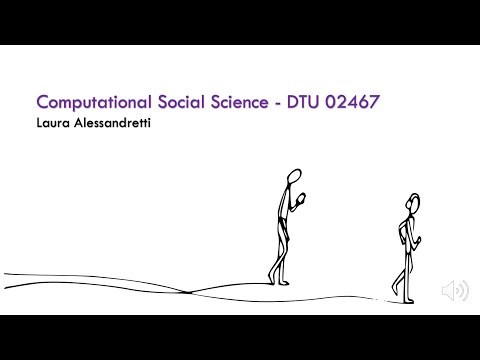

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("sdszHGaP_ag",width=800, height=450)

## Part 3: Visualizing distributions

Relying solely on summary statistics like the mean, median, and standard deviation to understand your dataset can sometimes be misleading. It's very good practice, to begin your analysis by visualizing the data distribution. Observing the probability distribution of data points can reveal a wealth of insights.

The problem is that real-world datasets often cover a wide range of values, spanning several orders of magnitude. Hence, basic methods of plotting histograms may not effectively represent these datasets. However, there are techniques to address this challenge and enhance visualization.

In the video lecture below, I demonstrate how to plot histograms for datasets with significant heterogeneity. The techniques are shown using two examples: a financial dataset on stock prices and returns, and data on the number of comments posted by Reddit users. But these methods are universally applicable. You can use them to visualize any type of data.


> *Video Lecture*: [Plotting histograms and distributions](https://www.youtube.com/watch?v=UpwEsguMtY4)

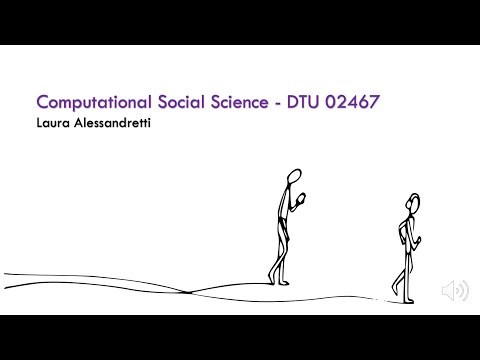

In [4]:
YouTubeVideo("UpwEsguMtY4",width=800, height=450)

> **Exercise 3: Analyzing Paper Citations**  In this exercise, we aim to explore the distribution of citations per author within the field of Computational Social Science. Our objectives are twofold:
> - *Learn to Plot Distributions:* We'll tackle the challenge of visualizing distributions for heterogeneous data, a common scenario in Computational Social Science.
> - *Investigate Author Recognition:* We'll analyze how recognition (measured in citations) varies for Computational Social Scientists from different countries.
>   
> **Dataset:** Use the "Authors dataset" you prepared in Exercise 2.
> 
> **Tasks:**
> 1. **Data Preparation:**
>    - Extract the total number of citations for each author from the dataset and store this information in an array.

In [10]:
import pandas as pd

import pandas as pd
import requests
from tqdm import tqdm

def get_cited_by_counts(df):
    cited_by_counts = []
    with requests.Session() as session:
        for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Updating authors"):
            # Extract the author id from the URL (assuming the ID column contains URLs)
            # e.g., "https://openalex.org/A5082130337" -> "A5082130337"
            author_url = row["ID"]
            author_id = author_url.split("/")[-1]
            
            # Build the request URL and parameters
            url = f"https://api.openalex.org/authors/{author_id}"
            params = {
                "select": "cited_by_count"
            }
            
            response = session.get(url, params=params)
            if response.status_code == 200:
                try:
                    result = response.json()
                    # Get the cited_by_count field
                    cited_by_count = result.get("cited_by_count", None)
                except Exception as e:
                    print(f"JSON decoding failed for {author_id}: {e}")
                    cited_by_count = None
            else:
                print(f"Error fetching data for {author_id}: {response.status_code}")
                cited_by_count = None
            
            cited_by_counts.append(cited_by_count)
    return cited_by_counts

authors_df = pd.read_csv("authors_combined.csv")
authors_df["cited_by_count"] = get_cited_by_counts(authors_df)
authors_df.to_csv("authors_updated.csv", index=False)
authors_df.head()

Updating authors: 100%|██████████| 16436/16436 [49:24<00:00,  5.54it/s] 


,ID,Name,Works API URL,Works Count,H-Index,Country Code,cited_by_count
0,https://openalex.org/A5082130337,A. Marthe Möller,https://api.openalex.org/works?filter=author.i...,13.0,6.0,NL,322
1,https://openalex.org/A5014647140,Aaron Clauset,https://api.openalex.org/works?filter=author.i...,284.0,48.0,US,28512
2,https://openalex.org/A5089395967,Aaron Nichols,https://api.openalex.org/works?filter=author.i...,10.0,2.0,US,77
3,https://openalex.org/A5053043999,Aaron J. Schein,https://api.openalex.org/works?filter=author.i...,19.0,16.0,US,954
4,https://openalex.org/A5082332656,Abdul Basit Adeel,https://api.openalex.org/works?filter=author.i...,9.0,4.0,US,113


> 2. **Plotting the Overall Citation Distribution:**
>    - Use [`numpy.histogram`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) to create a histogram of citations per author. Consider the following when plotting your histogram:
>        - **Number of bins:** The default behavior of `numpy.histogram` is to create 10 equally spaced bins. However, you should customize this to suit your data. Experiment with different numbers and sizes of bins to find the most informative visualization. Too few bins may oversimplify your data, while too many can result in a fragmented appearance.
>        - **Linear vs. Logarithmic Binning** Choose the approrpiate binning:
>          - Use *logarithmic binning* for heterogeneous data that has many extreme values (usuall in the right tail), creating bins with `numpy.logspace`.
>          - Else, use *linear binning*, creating bins with `numpy.linspace`.
>      - **Normalization** Where appropriate, you can convert your histogram into a Probability Density Function:
>        - set the `density=True` argument in `numpy.histogram`. This normalizes the histogram so the area under the curve equals 1, providing insights into the probability distribution of citations.
>

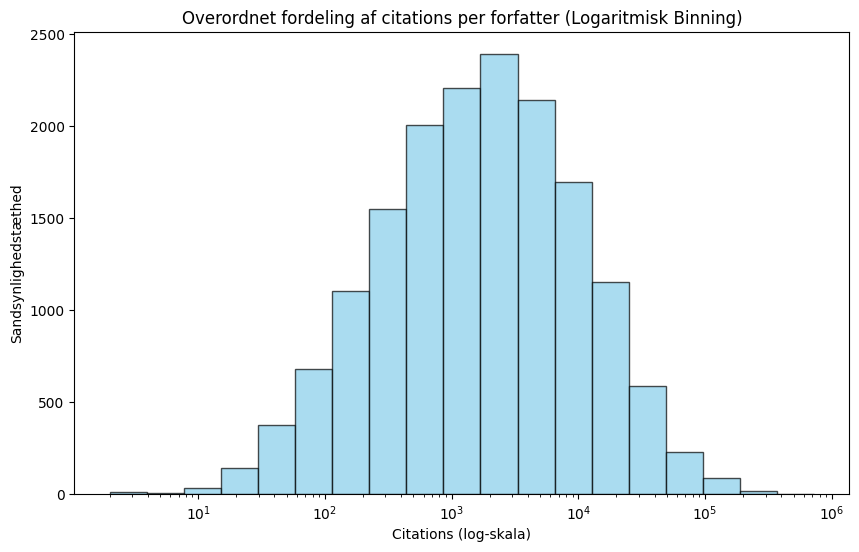

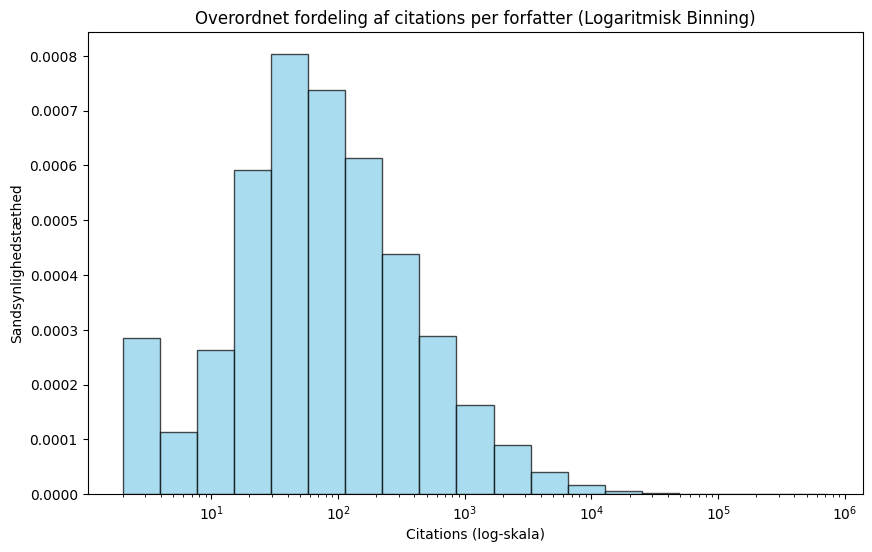

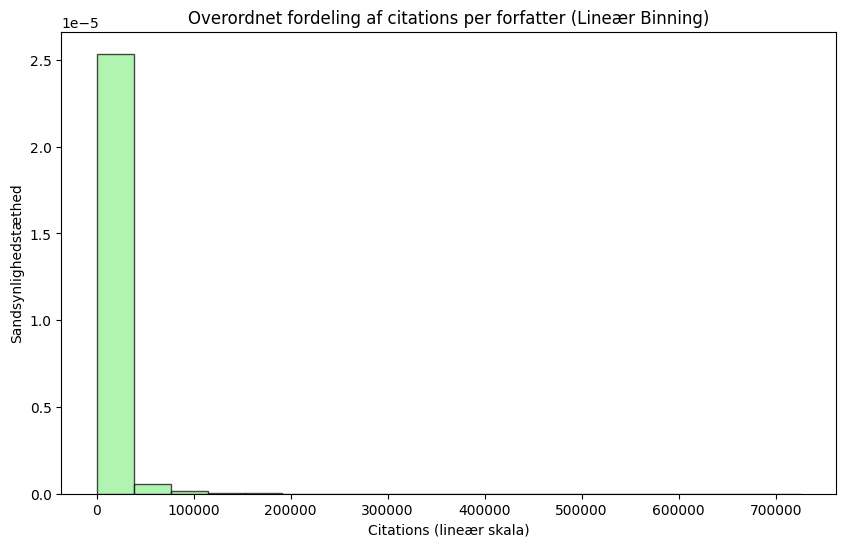

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data Preparation
# Læs dataset ind. Vi antager, at CSV-filen har kolonnerne 'author', 'country' og 'citations'
data = pd.read_csv('files/authors_updated.csv')

# Udtræk total antal citations for hver forfatter
citations = data['cited_by_count'].values

# Filtrer eventuelle nul-værdier for logaritmisk binning (da log(0) er udefineret)
citations_positive = citations[citations > 0]

n_bins = 20  # Juster antallet af bins efter behov
bins_log = np.logspace(np.log10(citations_positive.min()), np.log10(citations_positive.max()), n_bins)

# 2. Plotting med logaritmist ikke normaliseret
plt.figure(figsize=(10, 6))
plt.hist(citations, bins=bins_log, density=False, alpha=0.7, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.xlabel('Citations (log-skala)')
plt.ylabel('Sandsynlighedstæthed')
plt.title('Overordnet fordeling af citations per forfatter (Logaritmisk Binning)')
plt.show()

# 2. Plotting med logaritmisk binning
plt.figure(figsize=(10, 6))
plt.hist(citations, bins=bins_log, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.xlabel('Citations (log-skala)')
plt.ylabel('Sandsynlighedstæthed')
plt.title('Overordnet fordeling af citations per forfatter (Logaritmisk Binning)')
plt.show()

# 4. Plotting med lineær binning
n_bins_linear = 20  # Juster antallet af bins efter behov
bins_linear = np.linspace(citations.min(), citations.max(), n_bins_linear)

plt.figure(figsize=(10, 6))
plt.hist(citations, bins=bins_linear, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel('Citations (lineær skala)')
plt.ylabel('Sandsynlighedstæthed')
plt.title('Overordnet fordeling af citations per forfatter (Lineær Binning)')
plt.show()

> 3. **Comparative Histograms by Country:**
>    - Identify the top 5 countries by the number of authors. For each of these countries, plot the distribution of ciations per author (as a line plot). Overlay these histograms on the same figure for comparison.

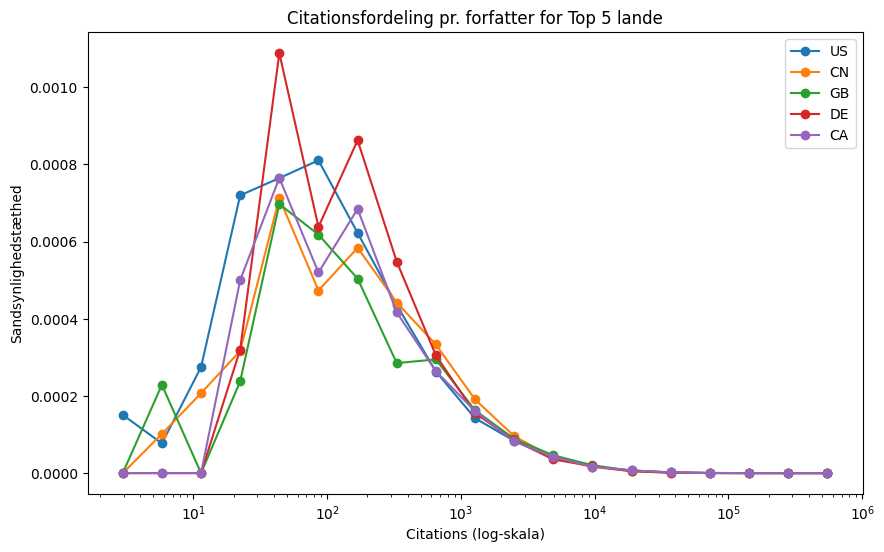

In [15]:
# 3. Komparative histogrammer for top 5 lande
# Identificer de 5 lande med flest forfattere
top_countries = data['Country Code'].value_counts().head(5).index

plt.figure(figsize=(10, 6))
for country in top_countries:
    # Filtrer citationer for forfattere fra det aktuelle land
    citations_country = data[data['Country Code'] == country]['cited_by_count'].values
    # Brug de samme bins som før for at sammenligne
    hist_country, bin_edges_country = np.histogram(citations_country, bins=bins_log, density=True)
    # Beregn midtpunktet for hver bin for en pæn line plot
    bin_centers = (bin_edges_country[:-1] + bin_edges_country[1:]) / 2
    plt.plot(bin_centers, hist_country, marker='o', label=country)

plt.xscale('log')
plt.xlabel('Citations (log-skala)')
plt.ylabel('Sandsynlighedstæthed')
plt.title('Citationsfordeling pr. forfatter for Top 5 lande')
plt.legend()
plt.show()

> 4. **Binning Decision:**
>    - Discuss whether you chose linear or logarithmic binning for the histograms in tasks 2 and 3 and justify your choice.

The logarithmic binning makes the plot a lot easier to look at visually. This is because most authors are cited by less than 40000, however there are outliers who have been cited more than a million times. With the logarithmic binning we get a more spread out histogram.

> 5. **Normalization Decision:**
>    - Explain whether you normalized the histograms and why. Describe in your own words the difference between normalized and non-normalized histograms.

By setting density to True we normalize the histogram so the area under the curve equals 1. This makes it easier to compare the different observations across different bins.

> 6. **Analysis of Recognition Distribution:**
>    - Analyze the plotted distributions to comment on how author recognition, as indicated by citation numbers, varies among authors in the whole dataset, as well as across the selected countries. In your answer, include a comment on the following aspects: the range of values that the distributions span along the x and y axes; the presence of extreme values or outliers; differences in trends across countries. 

There is a large range on the x-axis, and the highest observed number of citations is around 15 thousand, however only few authors reach that many citations.

The log binning shows that the data is skewed towards lower citation numbers. This is also the case when comparing countries, suggesting that most countries has a high number of authors with low citation values, but each also has some outliers with authors being cited by many papers.

When looking at the histogram that isn't normalised we can see that the median lies around 4000 citations. And around 2400 authors lies in the median out of the total number of 16436 authors in the dataset.

On the country separated plot its evident that that there are many germans in the dataset, since they make up a large portion of the total density.

### **Conclusion:**
The analysis reveals that citation counts vary widely, with the highest citation value reaching approximately 15,000; however, only a small number of authors attain such high figures. The log-binned histogram indicates a strong skew towards lower citation counts, a trend that persists across countries—most nations have a large proportion of authors with relatively few citations, albeit with a few outliers who are highly cited. Additionally, the non-normalized histogram shows that the median citation count is around 4,000, with about 2,400 authors clustering near this value out of a total of 16,436. Notably, the country-specific plot highlights that authors from Germany constitute a significant portion of the dataset.

This is the end of today's class :) [And here a little comic to end on a happy note](https://www.reddit.com/media?url=https%3A%2F%2Fi.redd.it%2F8xor77e2nh971.png)